In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.func.result_entities import *
from Modules.func.load_state_seq import *
from Modules.func.support_functions import *

In [2]:
shizophrenia_p, shizophrenia_c = load_data()
#Reshape 
shizophrenia_p = [np.array(X).reshape(len(X), 1) for X in shizophrenia_p]
shizophrenia_c = [np.array(X).reshape(len(X), 1) for X in shizophrenia_c]
patients_res, control_res = load_entities(directory='/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Results/latest_run_03.11.with_C/')

### State coefficient features

In [3]:
#Patients
pat_mean0 = np.array([patients_res[i].means[0] for i in range(0,len(patients_res))])
pat_mean1 = np.array([patients_res[i].means[1] for i in range(0,len(patients_res))])
pat_cov0 = np.array([patients_res[i].cov[0] for i in range(0,len(patients_res))])
pat_cov1 = np.array([patients_res[i].cov[1] for i in range(0,len(patients_res))])
#Controls
con_mean0 = np.array([control_res[i].means[0] for i in range(0,len(control_res))])
con_mean1 = np.array([control_res[i].means[1] for i in range(0,len(control_res))])
con_cov0 = np.array([control_res[i].cov[0] for i in range(0,len(control_res))])
con_cov1 = np.array([control_res[i].cov[1] for i in range(0,len(control_res))])

In [7]:
#Create DataFrame 
mean0 = np.concatenate((pat_mean0,con_mean0))
mean1 = np.concatenate((pat_mean1,con_mean1))
cov0 = np.concatenate((pat_cov0,con_cov0))
cov1 = np.concatenate((pat_cov1,con_cov1))
con = np.concatenate((np.ones(len(pat_cov0)),np.zeros(len(con_cov0))))
feat_dic = {'mean0': mean0, 'mean1': mean1, 'cov0': cov0, 'cov1': cov1, 'condition': con }
state_feat = pd.DataFrame(feat_dic)
from sklearn.preprocessing import StandardScaler
state_X = state_feat.drop(['condition'], axis=1)
state_y = state_feat['condition']
scaler = StandardScaler()
std_state_X = pd.DataFrame(scaler.fit_transform(state_X), columns= state_X.columns.values)

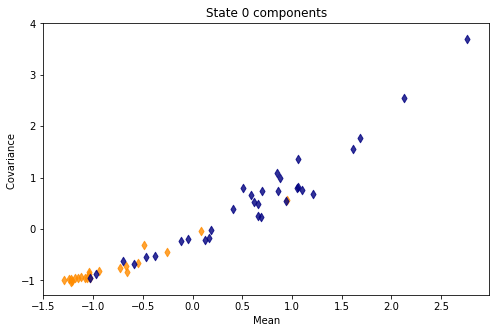

In [9]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in state_y]
shape = ['d' if k>0 else 'd' for k in state_y]
for x, l, c, m in zip( std_state_X['mean0'],  std_state_X['cov0'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('Mean')
    plt.ylabel('Covariance ')
    plt.title('State 0 components')


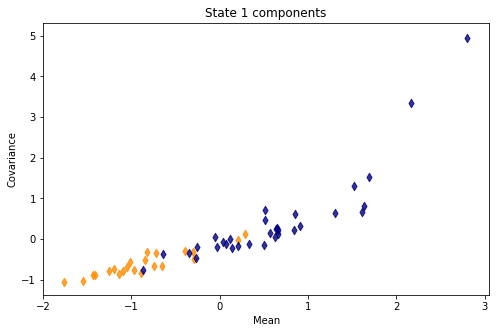

In [10]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in state_y]
shape = ['d' if k>0 else 'd' for k in state_y]
for x, l, c, m in zip( std_state_X['mean1'],  std_state_X['cov1'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('Mean')
    plt.ylabel('Covariance')
    plt.title('State 1 components')


In [11]:
from sklearn.decomposition import PCA, KernelPCA
pca = KernelPCA(n_components=2, kernel='linear')
principalComponents = pca.fit_transform(std_state_X)


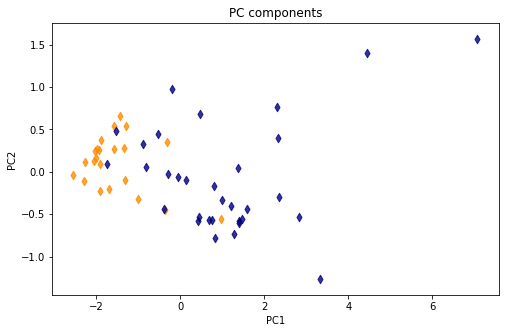

In [12]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in state_y]
shape = ['d' if k>0 else 'd' for k in state_y]
for x, l, c, m in zip( principalComponents[:,0],  principalComponents[:,1], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PC components')


Principial components of the mean and variance features for each state

### Link coefficient to integrated cosine function 

In [8]:
#Patients
pat_link_00 = np.array([patients_res[i].link1.iloc[0,1] for i in range(0,len(patients_res))])
pat_link_01 = np.array([patients_res[i].link1.iloc[1,1] for i in range(0,len(patients_res))])
pat_link_10 = np.array([patients_res[i].link2.iloc[0,0] for i in range(0,len(patients_res))])
pat_link_11 = np.array([patients_res[i].link2.iloc[1,0] for i in range(0,len(patients_res))])

In [9]:
#Controls
con_link_00 = np.array([control_res[i].link1.iloc[0,1] for i in range(0,len(control_res))])
con_link_01 = np.array([control_res[i].link1.iloc[1,1] for i in range(0,len(control_res))])
con_link_10 = np.array([control_res[i].link2.iloc[0,0] for i in range(0,len(control_res))])
con_link_11 = np.array([control_res[i].link2.iloc[1,0] for i in range(0,len(control_res))])

In [10]:
#Create DataFrame 
link00 = np.concatenate((pat_link_00,con_link_00))
link01 = np.concatenate((pat_link_01,con_link_01))
link10 = np.concatenate((pat_link_10,con_link_10))
link11 = np.concatenate((pat_link_11,con_link_11))
con = np.concatenate((np.ones(len(pat_link_11)),np.zeros(len(con_link_11))))
feat_dic = {'link00': link00, 'link01': link01, 'link10': link10, 'link11': link11, 'condition': con }
link_feat = pd.DataFrame(feat_dic)

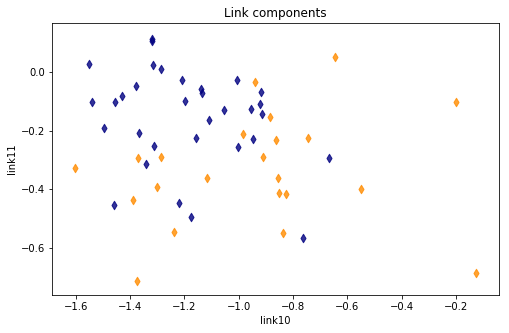

In [16]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in link_feat['condition']]
shape = ['d' if k>0 else 'd' for k in link_feat['condition']]
for x, l, c, m in zip( link_feat['link10'],  link_feat['link11'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('link10')
    plt.ylabel('link11')
    plt.title('Link components')

In [ ]:
#PCA for the links 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
link_X = link_feat.drop(['condition'], axis=1)
link_y = link_feat['condition']
# pca of features spaces 
pca = KernelPCA(n_components=2, kernel='linear')
principalComponents_all = pca.fit_transform(link_X)

In [ ]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in link_feat['condition']]
shape = ['d' if k>0 else 'd' for k in link_feat['condition']]
for x, l, c, m in zip( principalComponents_all[:,0],  principalComponents_all[:,1], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Link components')


## Analysis of the time depended transition matrix 

### Time varying probability to active to resting 

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15, 10))
ax0.plot(patients_res[12].trans_mat[1,0,:])
ax0.set_title('Patients Transition matrix')
ax1.plot(control_res[10].trans_mat[1,0,:])
ax1.set_title('Control Transition matrix')

### Time varying probability to resting to active

Text(0.5,1,'Control Transition matrix')

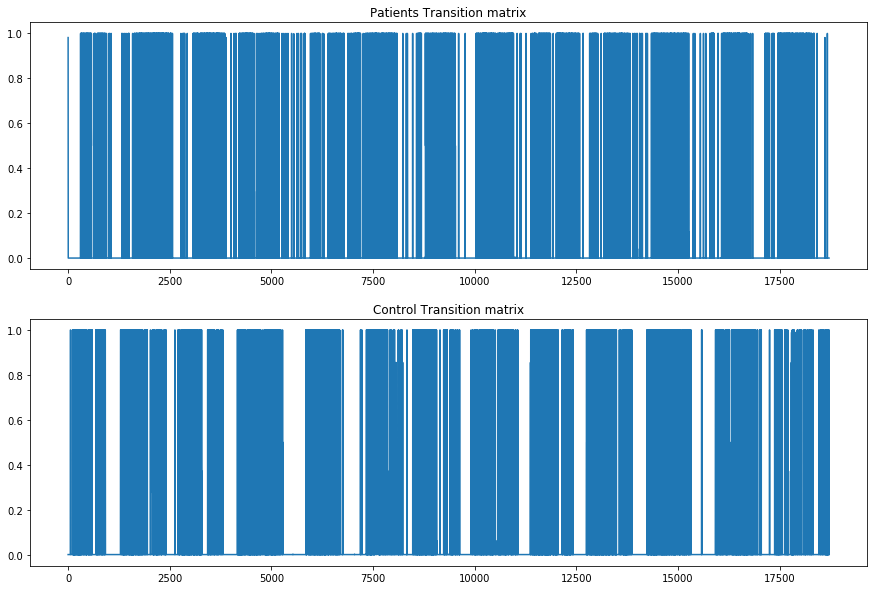

In [94]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15, 10))
ax0.plot(patients_res[10].trans_mat[0,1,:])
ax0.set_title('Patients Transition matrix')
ax1.plot(control_res[10].trans_mat[0,1,:])
ax1.set_title('Control Transition matrix')

## Analysis of the time depended transition matrix 48h

Text(0.5,1,'Control Transition matrix')

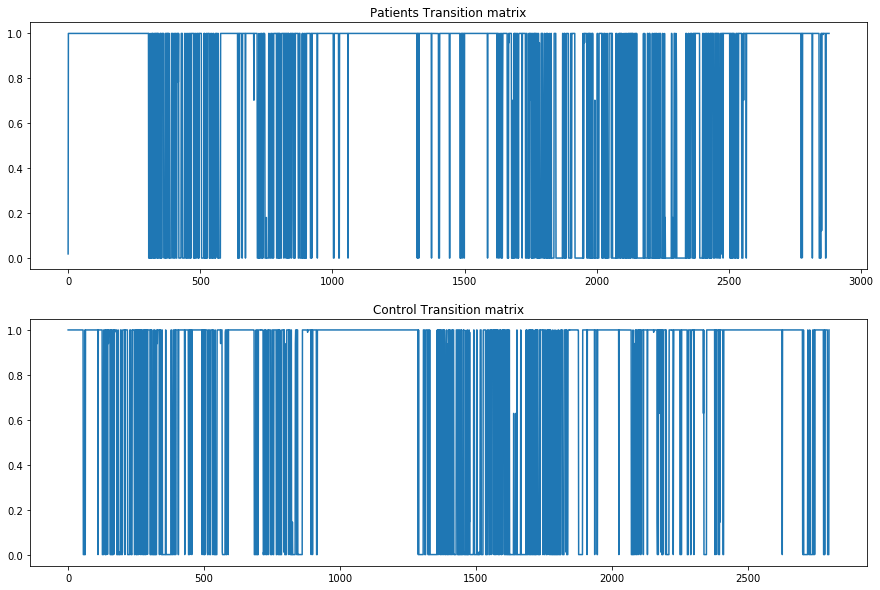

In [95]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15, 10))
ax0.plot(patients_res[10].trans_mat[1,0,:2880])
ax0.set_title('Patients Transition matrix')
ax1.plot(control_res[10].trans_mat[1,0,:2800])
ax1.set_title('Control Transition matrix')

## Extract the average daily transition probabilities 

In [17]:
days_p = [[patients_res[l].trans_mat[:,:,i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(patients_res[l].trans_mat[1,0,:])/(60*24))-1)] for l in range(0,len(patients_res))]
days_c = [[control_res[l].trans_mat[:,:,i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(control_res[l].trans_mat[1,0,:])/(60*24))-1)] for l in range(0,len(control_res))]
# Day mean and standard deviation

In [18]:
day_mean_p = [np.mean(days_p[i], axis=0) for i in range(0,len(days_p))]
day_mean_c = [np.mean(days_c[i], axis=0) for i in range(0,len(days_c))]

### Likelihood during a day to switch from resting to active

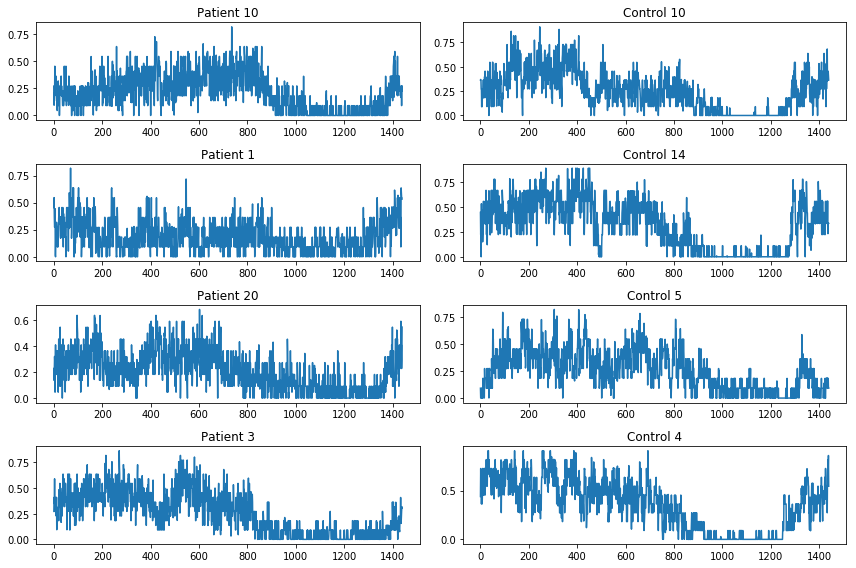

In [40]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(12, 8))
ax0.plot(day_mean_p[10][0,1,:])
ax0.set_title('Patient 10')
ax1.plot(day_mean_c[10][0,1,:])
ax1.set_title('Control 10')
ax2.plot(day_mean_p[1][0,1,:])
ax2.set_title('Patient 1')
ax3.plot(day_mean_c[14][0,1,:])
ax3.set_title('Control 14')
ax4.plot(day_mean_p[20][0,1,:])
ax4.set_title('Patient 20')
ax5.plot(day_mean_c[5][0,1,:])
ax5.set_title('Control 5')
ax6.plot(day_mean_p[3][0,1,:])
ax6.set_title('Patient 3')
ax7.plot(day_mean_c[4][0,1,:])
ax7.set_title('Control 4')
fig.tight_layout()

### Likelihood during a day to switch from active to resting 

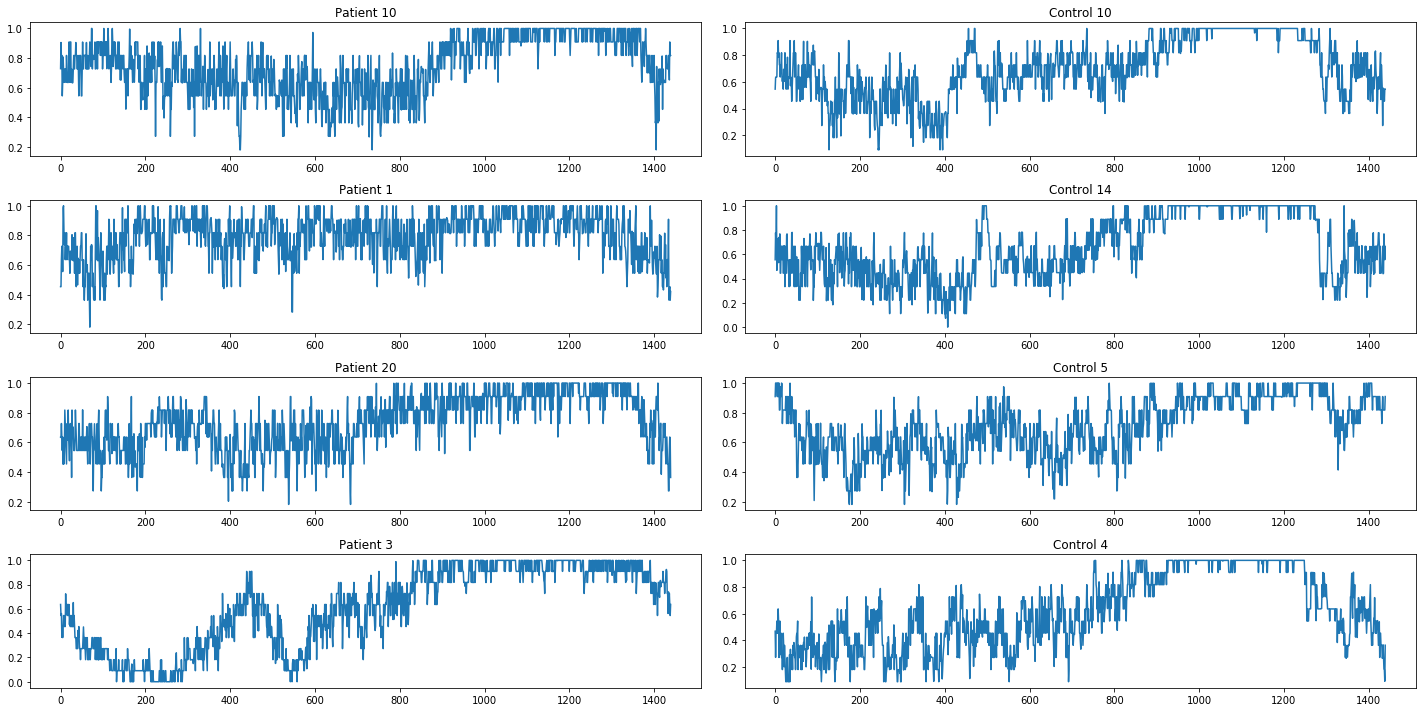

In [19]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(day_mean_p[10][1,0,:])
ax0.set_title('Patient 10')
ax1.plot(day_mean_c[10][1,0,:])
ax1.set_title('Control 10')
ax2.plot(day_mean_p[1][1,0,:])
ax2.set_title('Patient 1')
ax3.plot(day_mean_c[14][1,0,:])
ax3.set_title('Control 14')
ax4.plot(day_mean_p[20][1,0,:])
ax4.set_title('Patient 20')
ax5.plot(day_mean_c[5][1,0,:])
ax5.set_title('Control 5')
ax6.plot(day_mean_p[3][1,0,:])
ax6.set_title('Patient 3')
ax7.plot(day_mean_c[4][1,0,:])
ax7.set_title('Control 4')
fig.tight_layout()

### Load in state sequence

In [20]:
for i in range(0, len(shizophrenia_p)): load_state_sequence(shizophrenia_p[i], patients_res[i]) 
for j in range(0, len(shizophrenia_c)): load_state_sequence(shizophrenia_c[j], control_res[j]) 

In [37]:
hidden_states_p = patients_res[10].state_seq
hidden_states_c = control_res[10].state_seq

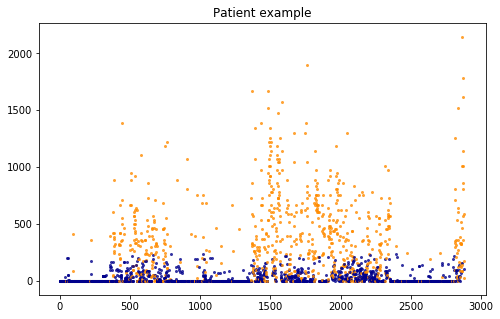

In [22]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x==1 else 'darkblue'for x in hidden_states_p[:2880]]
for x, l, c in zip(range(0,2880), shizophrenia_p[20][:2880], color):
    plt.scatter(x, l, alpha=0.8, c=c,marker='.', linewidths=0.01) 
    plt.title('Patient example')

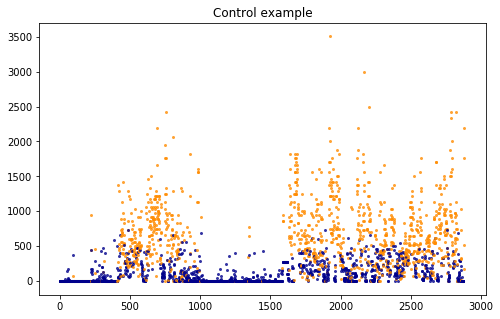

In [23]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x==1 else 'darkblue'for x in hidden_states_c[:2880]]
for x, l, c in zip(range(0,2880), shizophrenia_c[20][:2880], color):
    plt.scatter(x, l, alpha=0.8, c=c,marker='.', linewidths=0.01) 
    plt.title('Control example')

Text(0.5,1,'Control Example')

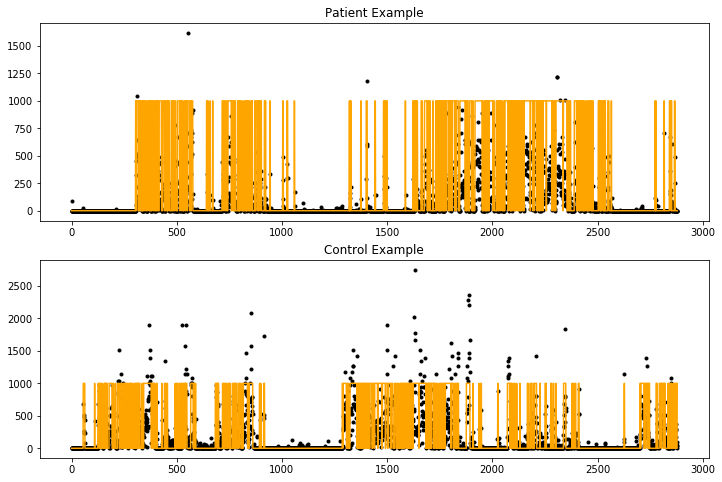

In [38]:
fig,(ax0,ax1)= plt.subplots(2,1,figsize=(12,8))
ax0.plot(hidden_states_p[:2880]*1000, color='orange')
ax0.scatter(range(0,2880), shizophrenia_p[10][:2880], marker = '.', color='black')
ax0.set_title('Patient Example')
ax1.plot(hidden_states_c[:2880]*1000, color='orange')
ax1.scatter(range(0,2880), shizophrenia_c[10][:2880], marker = '.', color='black')
ax1.set_title('Control Example')

Text(0.5,1,'Control Example')

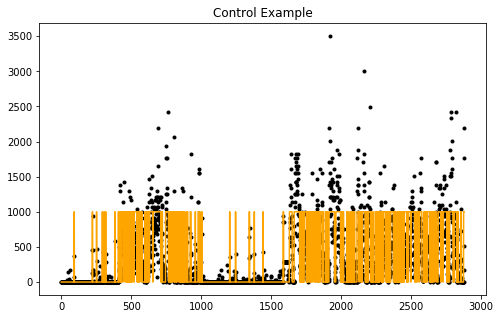

In [25]:
fig = plt.figure(figsize=(8,5))
plt.plot(hidden_states_c[:2880]*1000, color='orange')
plt.scatter(range(0,2880), shizophrenia_c[20][:2880], marker = '.', color='black')
plt.title('Control Example')

## Extract features from the time varying transition probabilities 

Extracted features: 
    - Mean value over the time: estimated Transition probability 
    - State moments
    - Link coefficients
    



In [11]:
#Transition probabilities 
trans_p_00 = np.array([np.mean(patients_res[i].trans_mat[0,0,:]) for i in range(0,len(patients_res))])
trans_c_00 = np.array([np.mean(control_res[i].trans_mat[0,0,:]) for i in range(0,len(control_res))])
trans_p_11 = np.array([np.mean(patients_res[i].trans_mat[1,1,:]) for i in range(0,len(patients_res))])
trans_c_11 = np.array([np.mean(control_res[i].trans_mat[1,1,:]) for i in range(0,len(control_res))])

trans_p_01 = np.array([np.mean(patients_res[i].trans_mat[0,1,:]) for i in range(0,len(patients_res))])
trans_c_01 = np.array([np.mean(control_res[i].trans_mat[0,1,:]) for i in range(0,len(control_res))])
trans_p_10 = np.array([np.mean(patients_res[i].trans_mat[1,0,:]) for i in range(0,len(patients_res))])
trans_c_10 = np.array([np.mean(control_res[i].trans_mat[1,0,:]) for i in range(0,len(control_res))])


In [12]:
trans_00 = np.concatenate([trans_p_00,trans_c_00])
trans_11 = np.concatenate([trans_p_11,trans_c_11])
trans_01 = np.concatenate([trans_p_01,trans_c_01])
trans_10 = np.concatenate([trans_p_10,trans_c_10])

In [13]:
con = np.concatenate((np.ones(len(pat_link_11)),np.zeros(len(con_link_11))))
feat_dic = {'trans_01': trans_01, 'trans_10': trans_10,'mean0': mean0, 'mean1':mean1, 'var0':cov0, 'var1':cov1,
            'link00':link00,'link01':link01,'link10':link10,
            'link11':link11, 'condition': con }
trans_mat_feat = pd.DataFrame(feat_dic)


In [14]:
char00 = np.empty(shape=(len(trans_00),), dtype='<U5')
char01 = np.empty(shape=(len(trans_01),), dtype='<U5')
char10 = np.empty(shape=(len(trans_10),), dtype='<U5')
char11 = np.empty(shape=(len(trans_11),), dtype='<U5')
con = np.tile(np.concatenate((np.ones(len(trans_p_01)),np.zeros(len(trans_c_01)))), 4)
labels = np.empty(shape=(len(con),), dtype='<U5')
labels[np.where(con==0)] = 'Control'
labels[np.where(con==1)] = 'Patient'
char00[:] = '0,0'
char01[:] = '0,1'
char10[:] = '1,0'
char11[:] = '1,1'
chars = np.squeeze(np.concatenate((char00,char01,char10,char11)))
probs = np.concatenate((trans_00,trans_01,trans_10,trans_11))
dic_ = {'Probability': probs, 'Transitions': chars, 'Condition': labels }
plot_data = pd.DataFrame(dic_)


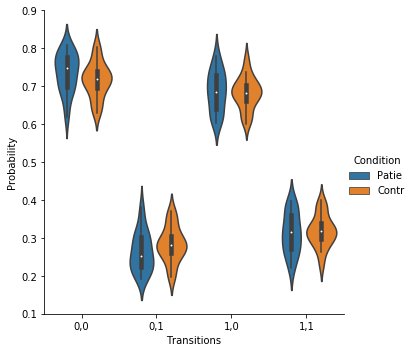

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Transitions", y="Probability",kind="violin",hue="Condition", data=plot_data)

# Classification 

### Correlation Matrix

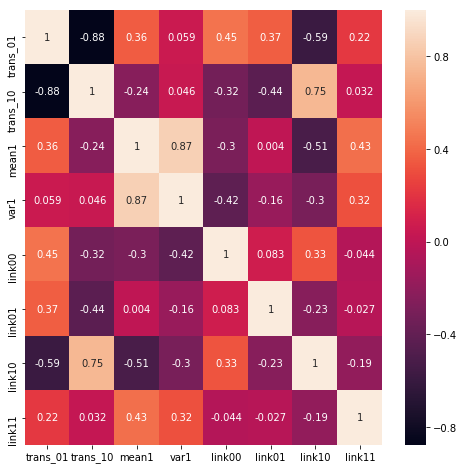

In [32]:
import seaborn as sns
X = trans_mat_feat.drop(['condition', 'mean0', 'var0'], axis=1)
y = trans_mat_feat['condition']
corr = X.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap="rocket", ax=ax)

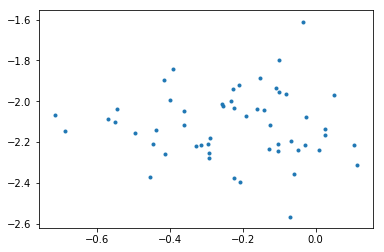

In [38]:
plt.scatter(trans_mat_feat['link11'], trans_mat_feat['link00'], marker='.')

# 

### L1 Regularization Plot Coefficients 


In [17]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
transmat_X = trans_mat_feat.drop(['condition', 'mean0', 'var0'], axis=1)
print(transmat_X.columns)
#Standardize the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(transmat_X), columns= transmat_X.columns.values)
y = trans_mat_feat['condition']

Index(['trans_01', 'trans_10', 'mean1', 'var1', 'link00', 'link01', 'link10',
       'link11'],
      dtype='object')


In [18]:
# Logisitc Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
#Standardize the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=123,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
class_weight = 'balanced'
penalty = 'l1'
C= [50,10, 5, 1, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01]
n_jobs =1
solver='liblinear'
coefs = []
areaUnderROC = []
average_precision = []
for c in C: 
    logReg = LogisticRegression(C=c,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs,fit_intercept=True )

    trainingScores = []
    cvScores = []
    
    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

    for train_index, test_index in k_fold.split(X_train,y_train):
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

        logReg.fit(X_train_fold, y_train_fold)
        loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

        trainingScores.append(loglossTraining)

        predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
        cvScores.append(loglossCV)
        preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
        preds.columns = ['trueLabel','prediction']
        predictionsBasedOnKFoldsLogisticRegression = preds.copy()
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    average_precision.append(average_precision_score(preds['trueLabel'],
                                            preds['prediction']))
    areaUnderROC.append(auc(fpr, tpr))
    
    coefs.append(logReg.coef_)
    
coefs = pd.DataFrame(np.squeeze(np.asarray(coefs)), columns = X.columns)  
coefs['C'] = C

res = np.concatenate((np.array(areaUnderROC,ndmin=2),np.array(average_precision,ndmin=2)),axis=0)
res = res.reshape(12,2)
pred_res = pd.DataFrame(res, columns = ['AUC', 'Avg_Precision'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Max AUC at C:  1
AUC 0.9470899470899471
Max Average Precision at C:  10
Max Average Precision 0.9382716049382716


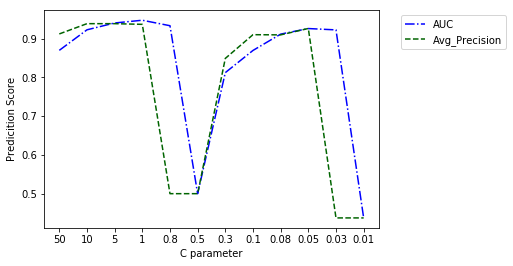

In [19]:
fig = plt.figure()
plt.plot(pred_res['AUC'], ls='-.', color='blue')
plt.plot(pred_res['Avg_Precision'], ls='--',color='darkgreen' )
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Predicition Score')
print('Max AUC at C: ',C[np.argmax(pred_res['AUC'])])
print('AUC',np.max(pred_res['AUC']))
print('Max Average Precision at C: ',C[np.argmax(pred_res['Avg_Precision'])])
print('Max Average Precision',np.max(pred_res['Avg_Precision']))

In [20]:
coefs

,trans_01,trans_10,mean1,var1,link00,link01,link10,link11,C
0,-2.071253,-2.200633,-8.783271,5.647895,3.279082,0.387858,-1.372797,0.065262,50.00
1,-1.277114,-2.264339,-5.752497,2.424001,1.777335,0.000000,-0.144877,0.000000,10.00
2,-0.700764,-1.611483,-3.930035,0.000000,1.339172,-0.048230,0.000000,-0.099615,5.00
3,0.000000,-0.189595,-2.369596,0.000000,0.847533,0.000000,0.000000,-0.399186,1.00
4,0.000000,-0.062604,-2.115152,0.000000,0.808616,0.000000,0.000000,-0.421419,0.80
5,0.000000,0.000000,-1.714844,0.000000,0.642317,0.000000,0.000000,-0.387730,0.50
6,0.000000,0.000000,-1.306181,0.000000,0.413463,0.000000,0.000000,-0.309126,0.30
7,0.000000,0.000000,-0.495116,0.000000,0.000000,0.000000,0.000000,0.000000,0.10
8,0.000000,0.000000,-0.246771,0.000000,0.000000,0.000000,0.000000,0.000000,0.08
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05


Text(0,0.5,'Coefficient value')

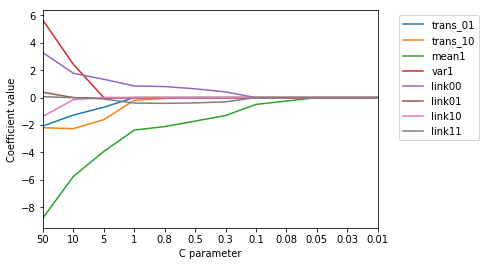

In [21]:
coefs_plot = coefs.drop(['C'], axis=1)
coefs_plot.plot()                 
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

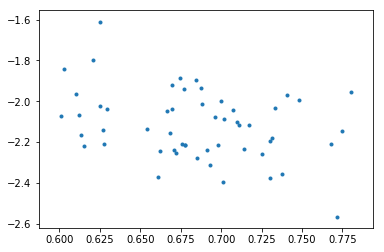

In [50]:
plt.scatter(trans_mat_feat['trans_10'], trans_mat_feat['link00'], marker='.')

## Iteration 1

In [47]:
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import StandardScaler

from statsmodels import tools
features = trans_mat_feat.drop(['condition', 'link10', 'link01','var0','var1','trans_01' ], axis=1)
names = features.columns
y = trans_mat_feat['condition']
for feat in names:
    print(feat)
    X = features[[feat]]
    #Standardize the data 
    scaler = StandardScaler()
    X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X_std)
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())


trans_10
Optimization terminated successfully.
         Current function value: 0.674155
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              condition   No. Observations:                   54
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.002583
Time:                        15:59:30   Log-Likelihood:                -36.404
converged:                       True   LL-Null:                       -36.499
Covariance Type:            nonrobust   LLR p-value:                    0.6641
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3760      0.278     -1.355      0.175      -0.920       0.168
trans_10       0.120

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return pt

## Iteration 2

In [30]:
from statsmodels.discrete.discrete_model import Logit
X = trans_mat_feat.drop(['condition', 'link10', 'link01','var0','var1',
                       'trans_01', 'mean0'], axis=1)
feat_n = X.columns.drop(['mean1'])

y = trans_mat_feat['condition']

#Standardize the data 
scaler = StandardScaler()
for f in feat_n:
    print(f)
    X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[['mean1',f]])
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())

trans_10
Optimization terminated successfully.
         Current function value: 0.204793
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              condition   No. Observations:                   54
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                  0.6970
Time:                        14:49:22   Log-Likelihood:                -11.059
converged:                       True   LL-Null:                       -36.499
Covariance Type:            nonrobust   LLR p-value:                 8.946e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7680      0.720     -2.456      0.014      -3.179      -0.357
mean1         -6.298

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
print('Patient Link intercept: ',np.mean(pat_link_00))
print('Control Link intercept: ',np.mean(con_link_00))
print('Patient Link coeff: ',np.mean(pat_link_11))
print('Control Link coeff: ',np.mean(con_link_11))


Patient Link intercept:  -2.043511538435314
Control Link intercept:  -2.1676549056365912
Patient Link coeff:  -0.3360459504463007
Control Link coeff:  -0.15674492061916476


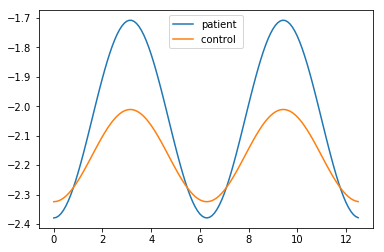

In [64]:
x = np.arange(0,4*np.pi,0.1)
cov_p = np.mean(pat_link_00)+np.cos(x)*np.mean(pat_link_11)
cov_c = np.mean(con_link_00)+np.cos(x)*np.mean(con_link_11)
plt.plot(x, cov_p, label = 'patient')
plt.plot(x, cov_c,label = 'control ')
plt.legend()

In [85]:
print('Amplitude increases by one than the odds of being schizo increases by:',np.exp(-1.3116 ),'times')

Amplitude increases by one than the odds of being schizo increases by: 0.26938868948002 times


In [86]:
print('Vertical shifts by one than the odds of being schizo increases by: ',np.exp(1.0525),'times')

Vertical shifts by one than the odds of being schizo increases by:  2.864804183464519 times


In [24]:
from statsmodels import tools
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import StandardScaler

from statsmodels import tools
X = trans_mat_feat.drop(['condition', 'link10', 'link01','var0','var1',
                       'trans_01', 'mean0'], axis=1)
y = trans_mat_feat['condition']
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
dat = tools.add_constant(X[['link11','link00']])
log_reg = Logit(y, dat).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.481403
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              condition   No. Observations:                   54
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                  0.2878
Time:                        18:49:10   Log-Likelihood:                -25.996
converged:                       True   LL-Null:                       -36.499
Covariance Type:            nonrobust   LLR p-value:                 2.746e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6026      0.359     -1.678      0.093      -1.306       0.101
link11        -1.3116      0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Confusion matrix:
[[21  7]
 [ 9 11]]
Matthews Corr Coef:  0.30550504633038933


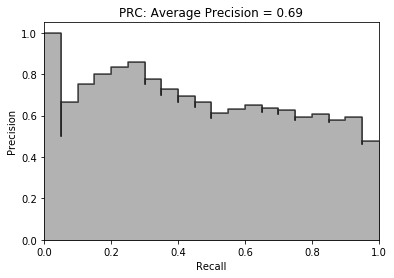

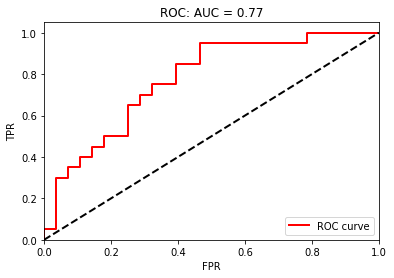

In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = trans_mat_feat[['link00', 'link11']]
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = trans_mat_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg_11 = LogisticRegression(C=C,random_state=104,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg_11.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg_11.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg_11.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Iteration 3

In [29]:
from statsmodels.discrete.discrete_model import Logit
X = trans_mat_feat.drop(['condition', 'link10', 'link01','var0','var1',
                       'trans_01', 'mean0'], axis=1)
feat_n = X.columns.drop(['mean1','trans_10'])

y = trans_mat_feat['condition']

#Standardize the data 
scaler = StandardScaler()
for f in feat_n:
    print(f)
    X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[['mean1','trans_10',f]])
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())

link00
Optimization terminated successfully.
         Current function value: 0.187598
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              condition   No. Observations:                   54
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                  0.7224
Time:                        14:49:18   Log-Likelihood:                -10.130
converged:                       True   LL-Null:                       -36.499
Covariance Type:            nonrobust   LLR p-value:                 2.086e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8068      0.752     -2.403      0.016      -3.280      -0.333
mean1         -5.8961 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Performance of link 11 in model 

Confusion matrix:
[[26  2]
 [ 3 17]]
Matthews Corr Coef:  0.784904242205507


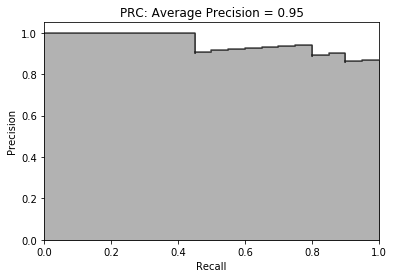

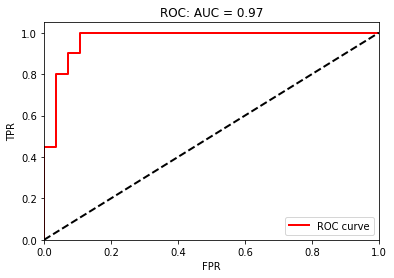

In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = trans_mat_feat[['mean1', 'trans_10', 'link11']]
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = trans_mat_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg_11 = LogisticRegression(C=C,random_state=104,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg_11.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg_11.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg_11.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Matthews Corr Coef:  0.7071067811865476
[[3 1]
 [0 2]]
Average Precision Test: 0.6666666666666666


Text(0.5,1,'PRC: Average Precision Test = 0.67')

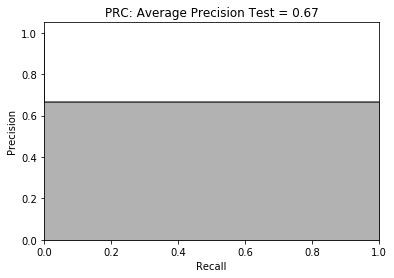

In [26]:

confusion_matrix(y_test, logReg_11.predict(X_test))
print('Matthews Corr Coef: ',matthews_corrcoef(y_test,logReg_11.predict(X_test).astype(np.double).round()))
average_precision = average_precision_score(y_test,logReg_11.predict(X_test))
print(confusion_matrix(y_test,logReg_11.predict(X_test).astype(np.double).round()))

print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg_11.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))


## Performance of link 00 in model 

Confusion matrix:
[[24  4]
 [ 2 18]]
Matthews Corr Coef:  0.7491587023046328


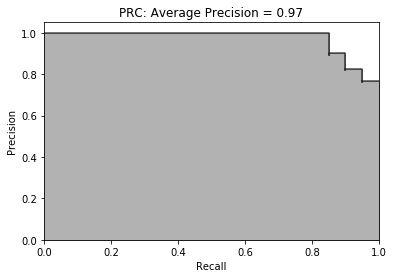

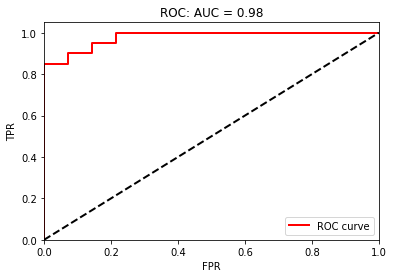

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = trans_mat_feat[['mean1', 'trans_10', 'link00']]
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = trans_mat_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg_00 = LogisticRegression(C=C,random_state=104,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg_00.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg_00.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg_00.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Matthews Corr Coef:  0.7071067811865476
[[3 1]
 [0 2]]
Average Precision Test: 0.6666666666666666


Text(0.5,1,'PRC: Average Precision Test = 0.67')

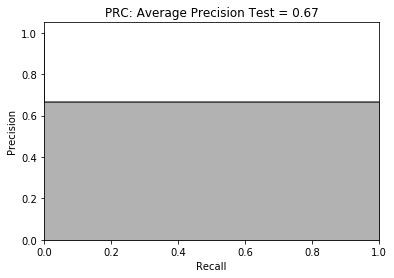

In [28]:

confusion_matrix(y_test, logReg_00.predict(X_test))
print('Matthews Corr Coef: ',matthews_corrcoef(y_test,logReg_00.predict(X_test).astype(np.double).round()))
average_precision = average_precision_score(y_test,logReg_00.predict(X_test))
print(confusion_matrix(y_test,logReg_00.predict(X_test).astype(np.double).round()))


print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg_00.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))

## Overall Performance

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = trans_mat_feat[['mean1', 'trans_10', 'link00']]
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = trans_mat_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=104,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:

confusion_matrix(y_test, logReg.predict(X_test))
print('Matthews Corr Coef: ',matthews_corrcoef(y_test,logReg.predict(X_test).astype(np.double).round()))
average_precision = average_precision_score(y_test,logReg.predict(X_test))


print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))
